In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(2)) 

        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100%_Bran   N    C        70        4    1     130   10.0    5.0       6   
1   All-Bran   K    C        70        4    1     260    9.0    7.0       5   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
1     320        25      3     1.0  0.33  59.425505  


In [2]:
dfnew = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins']]
# with and without rating

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


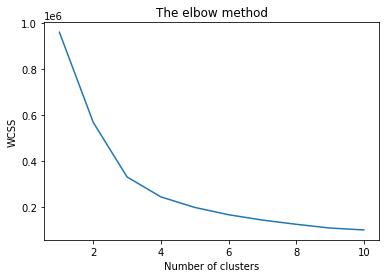

In [3]:
#Finding the optimum number of clusters for k-means classification - ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [4]:
from sklearn.cluster import KMeans
# cluster 4 or 8 
kmeans = KMeans(n_clusters=4)

kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [5]:
y_kmeans

array([3, 3, 3, 1, 3, 3, 2, 0, 1, 1, 1, 1, 3, 0, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 1, 1, 1, 0, 2, 3, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 3, 1, 0, 1, 1, 1, 1])

In [6]:
#dfnew.head()
df3 = dfnew.assign(clusterNo = y_kmeans, namex = df['name'])
print(df3.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

   clusterNo                      namex  
0          3                  100%_Bran  
1          3                   All-Bran  
2          3  All-Bran_with_Extra_Fiber  
3          1         Cracklin'_Oat_Bran  
4          3      Post_Nat._Raisin_Bran  


In [7]:
from pandasql import sqldf
print(sqldf("select namex,clusterno,calories from df3 order by clusterno"))


                    namex  clusterNo  calories
0          Almond_Delight          0       110
1            Cap'n'Crunch          0       120
2                Cheerios          0       110
3   Cinnamon_Toast_Crunch          0       120
4               Corn_Chex          0       110
..                    ...        ...       ...
69  Post_Nat._Raisin_Bran          3       120
70            Raisin_Bran          3       120
71            Bran_Flakes          3        90
72          Fruitful_Bran          3       120
73      Total_Raisin_Bran          3       140

[74 rows x 3 columns]


In [8]:
print(sqldf("select namex,clusterno,calories from df3 where clusterno=3"))

                       namex  clusterNo  calories
0                  100%_Bran          3        70
1                   All-Bran          3        70
2  All-Bran_with_Extra_Fiber          3        50
3      Post_Nat._Raisin_Bran          3       120
4                Raisin_Bran          3       120
5                Bran_Flakes          3        90
6              Fruitful_Bran          3       120
7          Total_Raisin_Bran          3       140


In [9]:
# OTHER TECH: HIERACHICAL DENDROGRAM

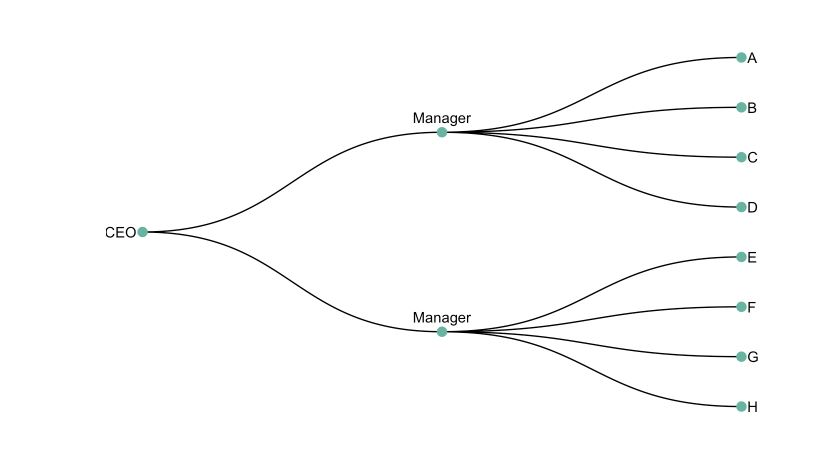

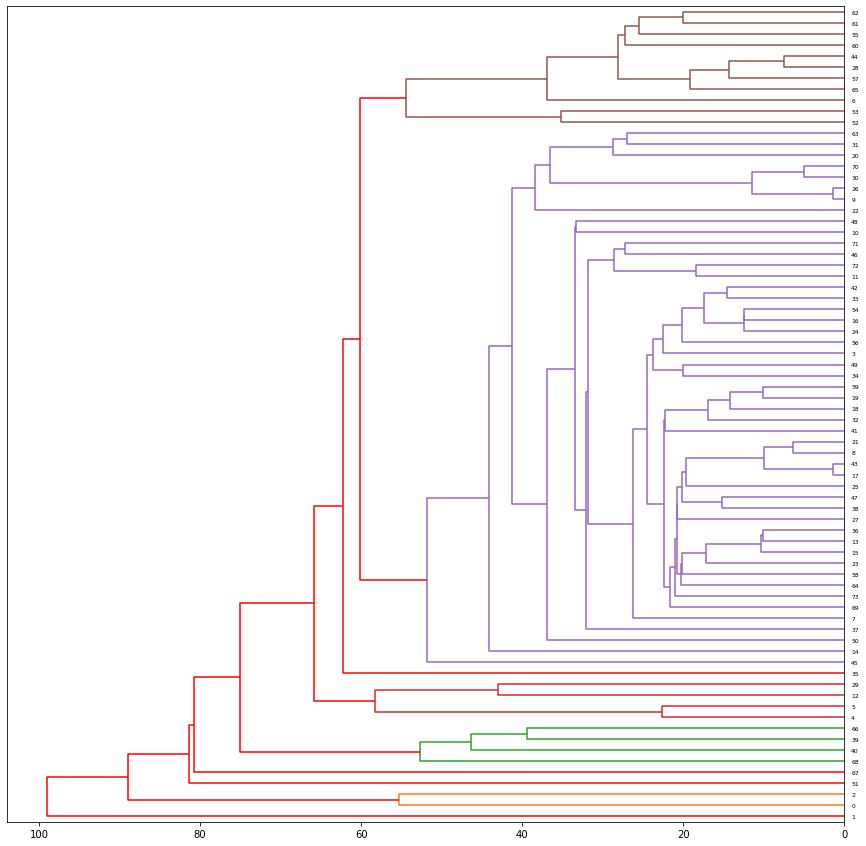

In [10]:
# OTHER TECH: HIERACHICAL DENDROGRAM
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name
linked = linkage(dfnew, 'single')
#linked
#print(type(linked))
plt.figure(figsize=(15, 15))  
zx = dendrogram(linked, orientation='left',labels=df.index, color_threshold=60, above_threshold_color='red')
plt.show()

# index Number at Leaf
#df = df.set_index('name')
#del df.index.name

In [11]:
#zx
# ICORD, DCORD, ivl, leaves, color_list, leaves_color_list'
#zx[color_list] 
#type(zx)  # dict
#zx['leaves_color_list']

In [12]:
#linked  # -- Explain

# The linkage matrix LINKED represents a dendrogram

#A  by 4 matrix Z is returned. 
#At the -th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster .
#A cluster with an index less than  corresponds to one of the  original observations. 
#The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. 
#The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [13]:
# Filter numpy ndarray (matrix) according to column values : Stackoverflow

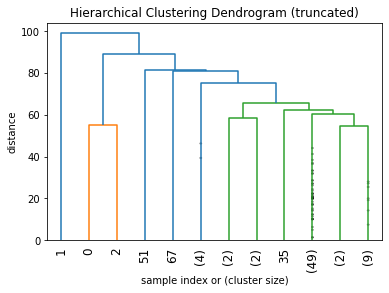

In [14]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
#Z = dendrogram(linked, orientation='left',labels=df.index, color_threshold=60, above_threshold_color='red')
dendrogram(
    linked,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

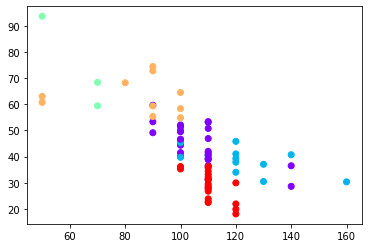

In [15]:

from sklearn.cluster import AgglomerativeClustering
import matplotlib as mpl

#Scaling of data
dfnew2 = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins','rating']]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = dfnew2
xScale = ss.fit_transform(x)

#xScale


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(xScale)
fig, ax = plt.subplots()
#x.iloc[:,0]
#print(x)
ax.scatter(x.iloc[:,0],x.iloc[:,9], c=cluster.labels_, cmap='rainbow')

In [16]:
# METRICS

#Elbow method
#Silhouette analysis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


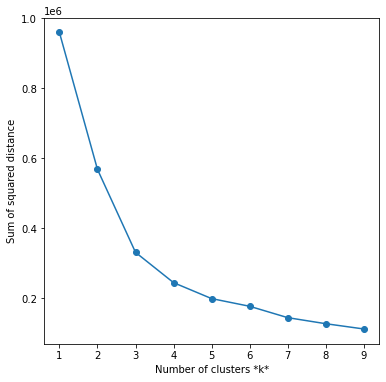

In [17]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(dfnew)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [18]:
# Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

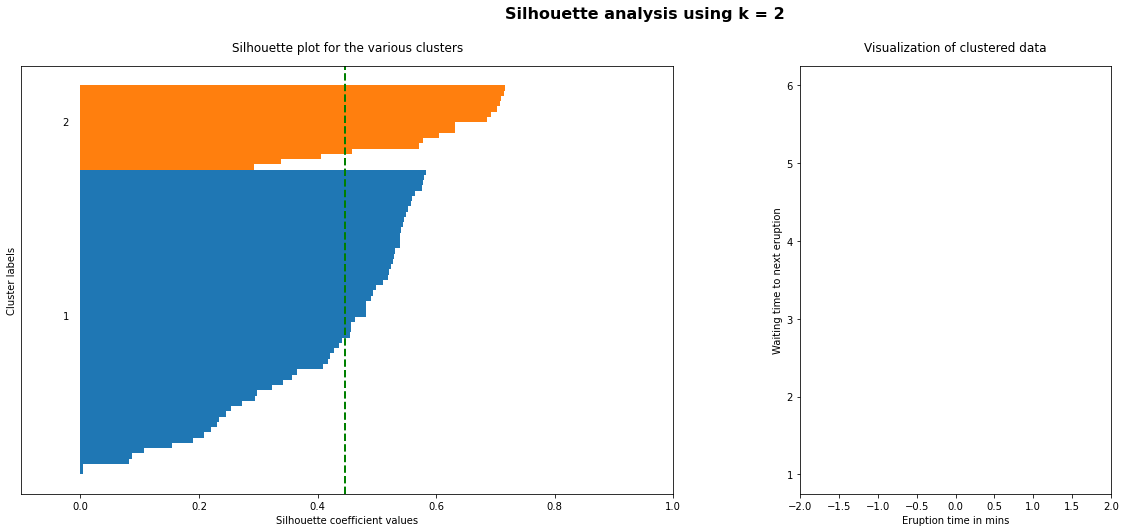

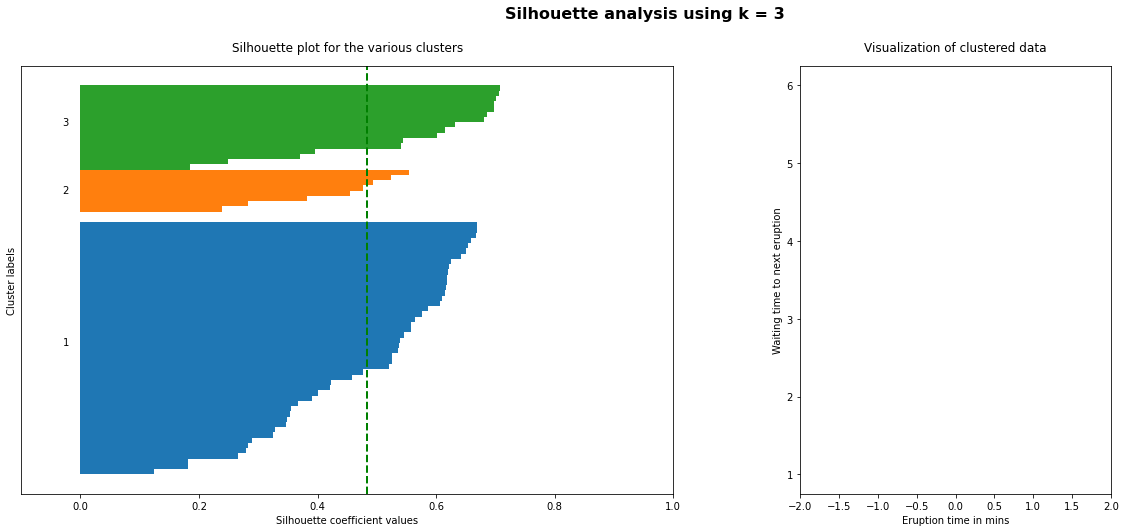

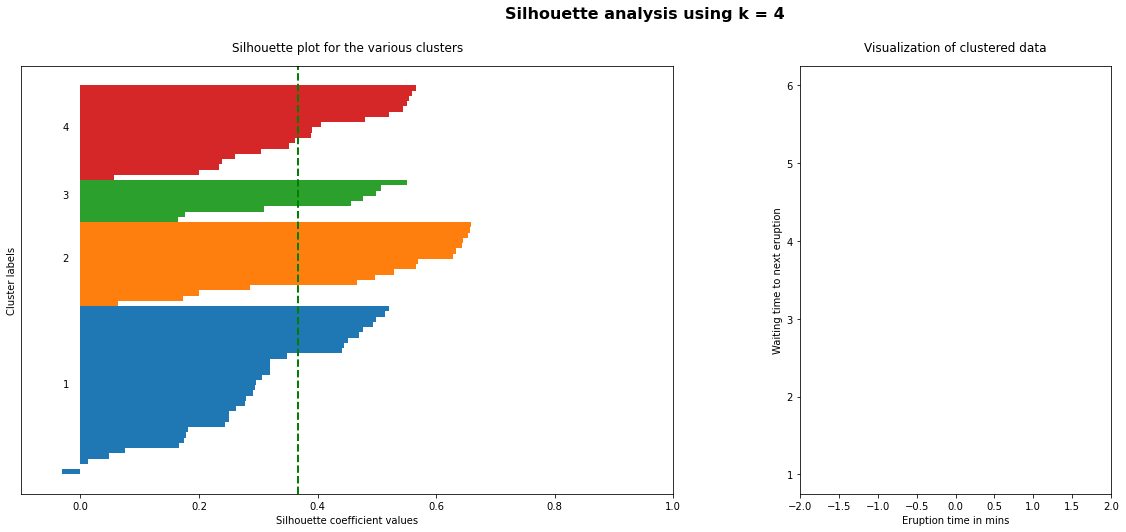

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(dfnew)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dfnew, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dfnew.iloc[:, 0], dfnew.iloc[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [25]:
kmeans.fit(dfnew)

KMeans(n_clusters=4)

In [31]:
# silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
#range_n_clusters = list (range(2,100))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfnew)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfnew, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.44635559787074447)
For n_clusters = 3, silhouette score is 0.4829102404367964)
For n_clusters = 4, silhouette score is 0.3667513693880734)
For n_clusters = 5, silhouette score is 0.37216207091948944)
For n_clusters = 6, silhouette score is 0.3654832247925142)
For n_clusters = 7, silhouette score is 0.38137493499998665)
For n_clusters = 8, silhouette score is 0.37135298667268113)
For n_clusters = 9, silhouette score is 0.3813483183568618)
For n_clusters = 10, silhouette score is 0.37385971937735313)
